# Dimension Reduction and Feature Extraction

P variables with N independent samples
$$
\boldsymbol{X} = \begin{bmatrix}
    x_{11} & \dots & x_{1j} & \dots & x_{1p}\\
    \vdots &&\vdots &&\vdots\\ 
    x_{i1} & \dots & x_{ij} & \dots & x_{ip}\\
    \vdots &&\vdots &&\vdots\\ 
    x_{N1} & \dots & x_{Nj} & \dots & x_{Np}\\
\end{bmatrix}_{n\times p}$$

## Singular Value Decomposition
### Matrix factorization principles

$$ X = UV^T$$

### Singular value decomposition (SVD)

$$ X = UDV^T $$

### SVD for variable transformation
\begin{align}
X  &= UDV^T\\
XV &= UD
\end{align}

In [49]:
import numpy as np
import scipy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('ggplot')
np.random.seed(42)

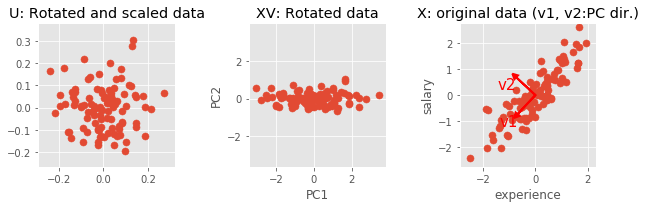

In [50]:
# dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])

# PCA using SVD
X -= X.mean(axis=0) # Centering is required
U, s, Vh = scipy.linalg.svd(X, full_matrices=False)

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.scatter(U[:, 0], U[:, 1], s=50)
plt.axis('equal')
plt.title("U: Rotated and scaled data")
plt.subplot(132)

PC = np.dot(X, Vh.T)
plt.scatter(PC[:, 0], PC[:, 1], s=50)
plt.axis('equal')
plt.title("XV: Rotated data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], s=50)
for i in range(Vh.shape[0]):
    plt.arrow(x=0, y=0, dx=Vh[i, 0], dy=Vh[i, 1], head_width=0.2, 
              head_length=0.2, linewidth=2, fc='r', ec='r')
    plt.text(Vh[i, 0], Vh[i, 1],'v%i' % (i+1), color="r", fontsize=15, 
             horizontalalignment='right', verticalalignment='top')
plt.axis('equal')
plt.ylim(-4, 4)
plt.title("X: original data (v1, v2:PC dir.)")
plt.xlabel("experience")
plt.ylabel("salary")
plt.tight_layout()

## Principal Component Analysis

[0.96321956 0.03678044]


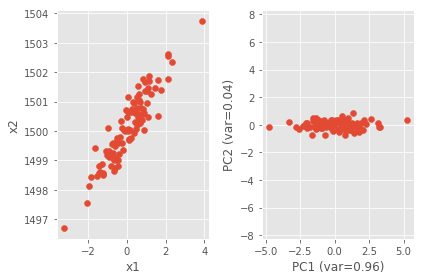

In [51]:
# dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])

# PCA with scikit-learn
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

PC = pca.transform(X)
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x1"); plt.ylabel("x2")
plt.subplot(122)
plt.scatter(PC[:, 0], PC[:, 1])
plt.xlabel("PC1 (var=%.2f)" % pca.explained_variance_ratio_[0])
plt.ylabel("PC2 (var=%.2f)" % pca.explained_variance_ratio_[1])
plt.axis('equal')
plt.tight_layout()

## Multi-dimensional Scaling (MDS)

In [53]:
try:
    url = '../data/eurodist.csv'
    df = pd.read_csv(url)
except:
    url = 'https://raw.githubusercontent.com/neurospin/pystatsml/master/datasets/eurodist.csv'
#    url = 'https://raw.github.com/neurospin/pystatsml/master/data/eurodist.csv'
    df = pd.read_csv(url)

print(df.iloc[:5, :5])

city = df["city"]
D = np.array(df.iloc[:, 1:])

from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', n_components=2, random_state=40, max_iter=3000, eps=1e-9)
X = mds.fit_transform(D)

        city  Athens  Barcelona  Brussels  Calais
0     Athens       0       3313      2963    3175
1  Barcelona    3313          0      1318    1326
2   Brussels    2963       1318         0     204
3     Calais    3175       1326       204       0
4  Cherbourg    3339       1294       583     460


In [54]:
from sklearn import metrics
Deuclidean = metrics.pairwise.pairwise_distances(X, metric='euclidean')
print(np.round(Deuclidean[:5, :5]))

[[   0. 3116. 2994. 3181. 3428.]
 [3116.    0. 1317. 1289. 1128.]
 [2994. 1317.    0.  198.  538.]
 [3181. 1289.  198.    0.  358.]
 [3428. 1128.  538.  358.    0.]]


(-1894.0978317854097,
 2914.361351065619,
 -1712.9820420628582,
 2145.445741131124)

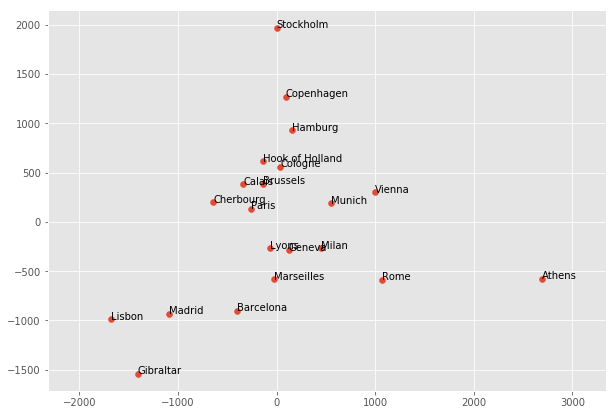

In [62]:
# Plot: apply some rotation and flip
theta = 80 * np.pi / 180.
rot = np.array([[np.cos(theta), -np.sin(theta)],
[np.sin(theta), np.cos(theta)]])
Xr = np.dot(X, rot)
# flip x
Xr[:, 0] *= -1
plt.figure(figsize=(10,7))
plt.scatter(Xr[:, 0], Xr[:, 1])
for i in range(len(city)):
    plt.text(Xr[i, 0], Xr[i, 1], city[i])
plt.axis('equal')

[48644495.28571428, 3356497.365752386, 2858455.4958879626, 2756310.637628011]


Text(0, 0.5, 'stress')

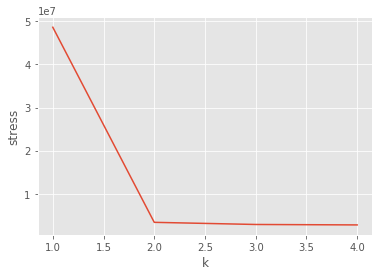

In [56]:
k_range = range(1, min(5, D.shape[0]-1))
stress = [MDS(dissimilarity='precomputed', n_components=k, 
              random_state=42, max_iter=300, eps=1e-9).fit(D).stress_ for k in k_range]
print(stress)
plt.plot(k_range, stress)
plt.xlabel("k")
plt.ylabel("stress")    

## Nonlinear dimensionality reduction

(-5.4164373180970395,
 5.276311544714795,
 -1.2349777101706614,
 1.2910940054965343)

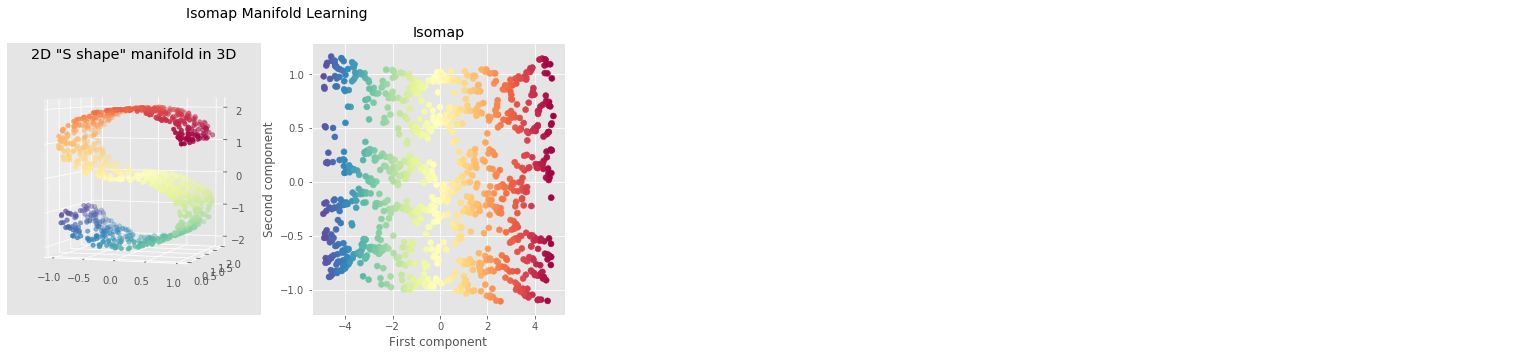

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

X, color = datasets.samples_generator.make_s_curve(1000, random_state=42)

fig = plt.figure(figsize=(10, 5))
plt.suptitle("Isomap Manifold Learning", fontsize=14)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.title('2D "S shape" manifold in 3D')
Y = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(X)
ax = fig.add_subplot(122)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.axis('tight')